# TD2: Deep learning

In this TD, you must modify this notebook to answer the questions. To do this,

1. Fork this repository
2. Clone your forked repository on your local computer
3. Answer the questions
4. Commit and push regularly

The last commit is due on Sunday, December 1, 11:59 PM. Later commits will not be taken into account.

Install and test PyTorch from  https://pytorch.org/get-started/locally.

In [1]:
%pip install torch torchvision

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


To test run the following code

In [2]:
import torch

N, D = 14, 10
x = torch.randn(N, D).type(torch.FloatTensor)
print(x)


from torchvision import models

alexnet = models.alexnet()
print(alexnet)

tensor([[-0.0287, -0.3610, -0.2144, -0.1869,  0.0448, -1.3221,  1.2156, -1.5161,
         -0.0738, -1.5216],
        [-0.3571,  2.5990, -0.1054, -0.2148,  0.3712, -0.6061,  0.0064,  1.7991,
         -0.4891, -0.6029],
        [ 1.3689, -1.5043,  1.1217, -0.0234,  0.4279,  0.7392, -0.1908,  0.7390,
          0.6863,  1.2689],
        [ 2.2412,  0.0354,  1.5499,  3.4446, -1.2053,  2.1999, -0.5730, -0.1503,
         -1.0004,  0.5117],
        [ 0.5736, -1.8955,  2.3903, -0.4593,  1.0364,  1.1222, -0.2918, -0.8412,
         -3.1904, -0.6934],
        [ 0.8607, -0.0693,  0.5679, -1.2844,  0.3564,  0.4297, -0.5515, -0.4954,
          0.3349,  1.6198],
        [ 0.4155,  1.1339, -0.1838,  0.0349,  0.4546, -1.4547, -0.8638, -1.3880,
          0.3984,  0.5021],
        [ 0.4776, -0.3063, -1.6641,  0.1818,  0.1121, -0.4417,  0.5848, -1.5887,
          1.2371, -1.0476],
        [-0.0410, -1.2441, -1.0461, -0.3563, -2.0059,  0.2034, -1.9438, -0.0221,
          0.9040,  0.1118],
        [ 0.8996,  

## Exercise 1: CNN on CIFAR10

The goal is to apply a Convolutional Neural Net (CNN) model on the CIFAR10 image dataset and test the accuracy of the model on the basis of image classification. Compare the Accuracy VS the neural network implemented during TD1.

Have a look at the following documentation to be familiar with PyTorch.

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

You can test if GPU is available on your machine and thus train on it to speed up the process

In [6]:
import torch

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print("CUDA is not available.  Training on CPU ...")
else:
    print("CUDA is available!  Training on GPU ...")

CUDA is not available.  Training on CPU ...


Next we load the CIFAR10 dataset

In [10]:
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# choose the training and test datasets
train_data = datasets.CIFAR10("data", train=True, download=True, transform=transform)
test_data = datasets.CIFAR10("data", train=False, download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=train_sampler, num_workers=num_workers
)
valid_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers
)

# specify the image classes
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

Files already downloaded and verified
Files already downloaded and verified


CNN definition (this one is an example)

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


# create a complete CNN
model = Net()
print(model)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Loss function and training using SGD (Stochastic Gradient Descent) optimizer

In [38]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store loss to visualize
valid_loss_min = np.Inf  # track change in validation loss
patience = 5 

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss
        patience_counter = 0
    else:
        patience_counter += 1
    # Early stopping check
    if patience_counter >= patience:
        print(f"Early stopping after {patience} epochs with no improvement.")
        break

Epoch: 0 	Training Loss: 43.012707 	Validation Loss: 37.752656
Validation loss decreased (inf --> 37.752656).  Saving model ...
Epoch: 1 	Training Loss: 34.595857 	Validation Loss: 33.780773
Validation loss decreased (37.752656 --> 33.780773).  Saving model ...
Epoch: 2 	Training Loss: 30.836263 	Validation Loss: 31.297239
Validation loss decreased (33.780773 --> 31.297239).  Saving model ...
Epoch: 3 	Training Loss: 28.638294 	Validation Loss: 28.093561
Validation loss decreased (31.297239 --> 28.093561).  Saving model ...
Epoch: 4 	Training Loss: 26.929054 	Validation Loss: 26.579745
Validation loss decreased (28.093561 --> 26.579745).  Saving model ...
Epoch: 5 	Training Loss: 25.477494 	Validation Loss: 25.782155
Validation loss decreased (26.579745 --> 25.782155).  Saving model ...
Epoch: 6 	Training Loss: 24.187990 	Validation Loss: 24.756659
Validation loss decreased (25.782155 --> 24.756659).  Saving model ...
Epoch: 7 	Training Loss: 23.117584 	Validation Loss: 24.214405
Valid

Does overfit occur? If so, do an early stopping.

It seems that the model is experiencing overfitting, as indicated by the increasing validation loss after a certain number of epochs and decreasing of the training loss.

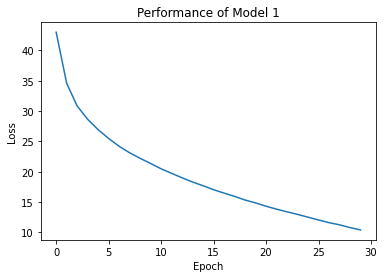

In [39]:
import matplotlib.pyplot as plt

plt.plot(range(n_epochs), train_loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.show()

Now loading the model with the lowest validation loss value


In [40]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 21.616368

Test Accuracy of airplane: 71% (719/1000)
Test Accuracy of automobile: 76% (760/1000)
Test Accuracy of  bird: 42% (421/1000)
Test Accuracy of   cat: 46% (460/1000)
Test Accuracy of  deer: 56% (568/1000)
Test Accuracy of   dog: 46% (463/1000)
Test Accuracy of  frog: 74% (747/1000)
Test Accuracy of horse: 68% (680/1000)
Test Accuracy of  ship: 76% (762/1000)
Test Accuracy of truck: 73% (735/1000)

Test Accuracy (Overall): 63% (6315/10000)


The model seems to perform well on certain classes but struggles with others. This behavior is not uncommon and may be influenced by factors such as class imbalance, the complexity of distinguishing certain objects, or the quality of the training data.

Build a new network with the following structure.

- It has 3 convolutional layers of kernel size 3 and padding of 1.
- The first convolutional layer must output 16 channels, the second 32 and the third 64.
- At each convolutional layer output, we apply a ReLU activation then a MaxPool with kernel size of 2.
- Then, three fully connected layers, the first two being followed by a ReLU activation and a dropout whose value you will suggest.
- The first fully connected layer will have an output size of 512.
- The second fully connected layer will have an output size of 64.

Compare the results obtained with this new network to those obtained previously.

In [8]:
import torch.nn as nn

class NewNet(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(NewNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # MaxPool after each convolutional layer
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        # ReLU activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        # Convolutional layers with ReLU activation and MaxPool
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        
        # Flatten before fully connected layers
        x = x.view(-1, 64 * 4 * 4)
        
        # Fully connected layers with ReLU activation and dropout
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        
        return x

# create a complete CNN
model2 = NewNet()
print(model2)
# move tensors to GPU if CUDA is available
if train_on_gpu:
    model2.cuda()

NewNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [13]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()  # specify loss function
optimizer = optim.SGD(model2.parameters(), lr=0.01)  # specify optimizer

n_epochs = 30  # number of epochs to train the model
train_loss_list = []  # list to store train loss to visualize
valid_loss_list = [] #  list to store valid loss to visualize
valid_loss_min = np.Inf  # track change in validation loss

for epoch in range(n_epochs):
    # Keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0

    # Train the model
    model2.train()
    for data, target in train_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Clear the gradients of all optimized variables
        optimizer.zero_grad()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step (parameter update)
        optimizer.step()
        # Update training loss
        train_loss += loss.item() * data.size(0)

    # Validate the model
    model2.eval()
    for data, target in valid_loader:
        # Move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # Forward pass: compute predicted outputs by passing inputs to the model
        output = model2(data)
        # Calculate the batch loss
        loss = criterion(output, target)
        # Update average validation loss
        valid_loss += loss.item() * data.size(0)

    # Calculate average losses
    train_loss = train_loss / len(train_loader)
    valid_loss = valid_loss / len(valid_loader)
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)

    # Print training/validation statistics
    print(
        "Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}".format(
            epoch, train_loss, valid_loss
        )
    )

    # Save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print(
            "Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...".format(
                valid_loss_min, valid_loss
            )
        )
        torch.save(model2.state_dict(), "model_cifar.pt")
        valid_loss_min = valid_loss

Epoch: 0 	Training Loss: 34.900787 	Validation Loss: 31.538971
Validation loss decreased (inf --> 31.538971).  Saving model ...
Epoch: 1 	Training Loss: 32.470619 	Validation Loss: 29.683813
Validation loss decreased (31.538971 --> 29.683813).  Saving model ...
Epoch: 2 	Training Loss: 30.576890 	Validation Loss: 28.121765
Validation loss decreased (29.683813 --> 28.121765).  Saving model ...
Epoch: 3 	Training Loss: 28.939276 	Validation Loss: 26.224042
Validation loss decreased (28.121765 --> 26.224042).  Saving model ...
Epoch: 4 	Training Loss: 27.476710 	Validation Loss: 24.918907
Validation loss decreased (26.224042 --> 24.918907).  Saving model ...
Epoch: 5 	Training Loss: 25.870124 	Validation Loss: 23.086918
Validation loss decreased (24.918907 --> 23.086918).  Saving model ...
Epoch: 6 	Training Loss: 24.548268 	Validation Loss: 21.868329
Validation loss decreased (23.086918 --> 21.868329).  Saving model ...
Epoch: 7 	Training Loss: 23.129688 	Validation Loss: 20.934011
Valid

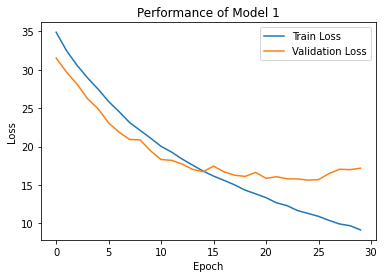

In [14]:
import matplotlib.pyplot as plt

# Assuming the values of n_epochs, train_loss_list, and val_loss_list are available
plt.plot(range(n_epochs), train_loss_list, label='Train Loss')
plt.plot(range(n_epochs), valid_loss_list, label='Validation Loss')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Performance of Model 1")
plt.legend()
plt.show()

The graph shows that the trainning and validation loss decrease gradually with each epoch with the approximatlly the same slope. However, after the epoch number 15 we could see a gap between the validation loss and the training loss in a way that the validation loss start decreasing. That's an indication of overfitting to the trainning sample.

In [14]:
model.load_state_dict(torch.load("./model_cifar.pt"))

# track test loss
test_loss = 0.0
class_correct = list(0.0 for i in range(10))
class_total = list(0.0 for i in range(10))

model2.eval()
# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model2(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item() * data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = (
        np.squeeze(correct_tensor.numpy())
        if not train_on_gpu
        else np.squeeze(correct_tensor.cpu().numpy())
    )
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss / len(test_loader)
print("Test Loss: {:.6f}\n".format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print(
            "Test Accuracy of %5s: %2d%% (%2d/%2d)"
            % (
                classes[i],
                100 * class_correct[i] / class_total[i],
                np.sum(class_correct[i]),
                np.sum(class_total[i]),
            )
        )
    else:
        print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

print(
    "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
    % (
        100.0 * np.sum(class_correct) / np.sum(class_total),
        np.sum(class_correct),
        np.sum(class_total),
    )
)

Test Loss: 16.546209

Test Accuracy of airplane: 84% (847/1000)
Test Accuracy of automobile: 88% (880/1000)
Test Accuracy of  bird: 53% (532/1000)
Test Accuracy of   cat: 59% (590/1000)
Test Accuracy of  deer: 73% (730/1000)
Test Accuracy of   dog: 69% (691/1000)
Test Accuracy of  frog: 78% (787/1000)
Test Accuracy of horse: 82% (820/1000)
Test Accuracy of  ship: 80% (803/1000)
Test Accuracy of truck: 84% (840/1000)

Test Accuracy (Overall): 75% (7520/10000)


## Exercise 2: Quantization: try to compress the CNN to save space

Quantization doc is available from https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic
        
The Exercise is to quantize post training the above CNN model. Compare the size reduction and the impact on the classification accuracy 


The size of the model is simply the size of the file.

In [17]:
import os


def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("model: ", label, " \t", "Size (KB):", size / 1e3)
    os.remove("temp.p")
    return size


print_size_of_model(model2, "fp32")

model:  fp32  	 Size (KB): 2330.946


2330946

Post training quantization example

In [18]:
import torch.quantization


quantized_model = torch.quantization.quantize_dynamic(model2, dtype=torch.qint8)
print_size_of_model(quantized_model, "int8")

model:  int8  	 Size (KB): 659.806


659806

For each class, compare the classification test accuracy of the initial model and the quantized model. Also give the overall test accuracy for both models.

In [20]:
def evaluate_model(model, dataloader):
    model.eval()
    test_loss = 0.0
    class_correct = list(0.0 for i in range(10))
    class_total = list(0.0 for i in range(10))

    with torch.no_grad():
        for data, target in dataloader:
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)

            _, pred = torch.max(output, 1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            correct = (
                np.squeeze(correct_tensor.numpy())
                if not train_on_gpu
                else np.squeeze(correct_tensor.cpu().numpy())
            )

            for i in range(batch_size):
                label = target.data[i]
                class_correct[label] += correct[i].item()
                class_total[label] += 1

    test_loss = test_loss / len(dataloader)
    return test_loss, class_correct, class_total

def print_results(test_loss, class_correct, class_total):
    print("Test Loss: {:.6f}\n".format(test_loss))

    for i in range(10):
        if class_total[i] > 0:
            print(
                "Test Accuracy of %5s: %2d%% (%2d/%2d)"
                % (
                    classes[i],
                    100 * class_correct[i] / class_total[i],
                    np.sum(class_correct[i]),
                    np.sum(class_total[i]),
                )
            )
        else:
            print("Test Accuracy of %5s: N/A (no training examples)" % (classes[i]))

    print(
        "\nTest Accuracy (Overall): %2d%% (%2d/%2d)"
        % (
            100.0 * np.sum(class_correct) / np.sum(class_total),
            np.sum(class_correct),
            np.sum(class_total),
        )
    )


In [23]:
# Evaluate the initial model1 on the test set
initial_test_loss, initial_class_correct, initial_class_total = evaluate_model(model, test_loader)

# Print the results for the initial model1
print("\nInitial Model (model1) Results:")
print_results(initial_test_loss, initial_class_correct, initial_class_total)

# quantize the model1 of the class Net
quantized_model1 = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)

# Evaluate the quantized model on the test set
quantized_test_loss, quantized_class_correct, quantized_class_total = evaluate_model(quantized_model1, test_loader)

# Print the results for the quantized model
print("\nQuantized Model Results:")
print_results(quantized_test_loss, quantized_class_correct, quantized_class_total)

################################################################################
################################################################################
################################################################################

# Evaluate the modified model2 on the test set
modified_test_loss, modified_class_correct, modified_class_total = evaluate_model(model2, test_loader)

# Print the results for the modified model2
print("\nModified Model (model2) Results:")
print_results(modified_test_loss, modified_class_correct, modified_class_total)

# quantize the model2 of the NewNet
quantized_model = torch.quantization.quantize_dynamic(model2, dtype=torch.qint8)

# Evaluate the quantized model on the test set
quantized_test_loss, quantized_class_correct, quantized_class_total = evaluate_model(quantized_model, test_loader)

# Print the results for the quantized model
print("\nQuantized Model Results:")
print_results(quantized_test_loss, quantized_class_correct, quantized_class_total)



Initial Model (model1) Results:
Test Loss: 14.881969

Test Accuracy of airplane: 77% (776/1000)
Test Accuracy of automobile: 87% (876/1000)
Test Accuracy of  bird: 60% (607/1000)
Test Accuracy of   cat: 54% (549/1000)
Test Accuracy of  deer: 70% (705/1000)
Test Accuracy of   dog: 65% (659/1000)
Test Accuracy of  frog: 84% (840/1000)
Test Accuracy of horse: 82% (828/1000)
Test Accuracy of  ship: 84% (847/1000)
Test Accuracy of truck: 84% (840/1000)

Test Accuracy (Overall): 75% (7527/10000)

Quantized Model Results:
Test Loss: 14.892860

Test Accuracy of airplane: 77% (777/1000)
Test Accuracy of automobile: 87% (879/1000)
Test Accuracy of  bird: 60% (609/1000)
Test Accuracy of   cat: 54% (547/1000)
Test Accuracy of  deer: 70% (704/1000)
Test Accuracy of   dog: 66% (661/1000)
Test Accuracy of  frog: 84% (841/1000)
Test Accuracy of horse: 82% (828/1000)
Test Accuracy of  ship: 84% (847/1000)
Test Accuracy of truck: 83% (839/1000)

Test Accuracy (Overall): 75% (7532/10000)

Modified Model

It appears that the quantized model has similar overall accuracy compared to the original and modified models. However, there might be slight variations in class-specific accuracies.

Try training aware quantization to mitigate the impact on the accuracy (doc available here https://pytorch.org/docs/stable/quantization.html#torch.quantization.quantize_dynamic)

## Exercise 3: working with pre-trained models.

PyTorch offers several pre-trained models https://pytorch.org/vision/0.8/models.html        
We will use ResNet50 trained on ImageNet dataset (https://www.image-net.org/index.php). Use the following code with the files `imagenet-simple-labels.json` that contains the imagenet labels and the image dog.png that we will use as test.


Predicted class is: tiger cat


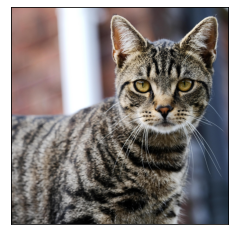

In [28]:
import json
from PIL import Image
import matplotlib.pyplot as plt

# Choose an image to pass through the model
# test_image = "dog.png"
test_image = 'cat.jpg'

# Configure matplotlib for pretty inline plots
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
# Load the image

image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension, and send the image to the GPU
# image = data_transform(image).unsqueeze(0).cuda()
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)
# Send the model to the GPU
# model.cuda()
# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)
# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

Experiments:

Study the code and the results obtained. Possibly add other images downloaded from the internet.

What is the size of the model? Quantize it and then check if the model is still able to correctly classify the other images.

Experiment with other pre-trained CNN models.

    


Size of the model (RESNET50)

In [29]:
import os
import torch.quantization

# Function to print the size of the model
def print_size_of_model(model, label=""):
    torch.save(model.state_dict(), "temp.p")
    size = os.path.getsize("temp.p")
    print("Model: {}\tSize (KB): {:.2f}".format(label, size / 1e3))
    os.remove("temp.p")
    return size

In [30]:
# Load the pre-trained ResNet-50 model
model = models.resnet50(pretrained=True)

# Print the size of the original model
print_size_of_model(model, "Original")

Model: Original	Size (KB): 102523.24


102523238

In [31]:
# Apply quantization
quantized_model = torch.quantization.quantize_dynamic(model, dtype=torch.qint8)

# Print the size of the quantized model
print_size_of_model(quantized_model, "Quantized")

Model: Quantized	Size (KB): 96380.00


96379996

Let's now test with new images, here i imported 5 images that i found in the internet. More preciseley, dog.png, bird;png, bird2.png, bird3.jpeg, cat.jpg

Image: dog.png	Predicted class: Golden Retriever
Image: bird.jpg	Predicted class: jay
Image: bird2.jpg	Predicted class: jacamar
Image: bird3.jpeg	Predicted class: jacamar
Image: cat.jpg	Predicted class: tiger cat


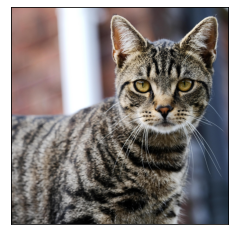

In [36]:
# Test the quantized model on other images
other_images = ["dog.png", "bird.jpg","bird2.jpg","bird3.jpeg","cat.jpg"]

for image_path in other_images:
    image = Image.open(image_path)
    plt.imshow(image), plt.xticks([]), plt.yticks([])
    image = data_transform(image).unsqueeze(0)
    # Evaluate the quantized model
    with torch.no_grad():
        output = quantized_model(image)
    # Get the predicted class
    predicted_class = labels[output.argmax()]
    print("Image: {}\tPredicted class: {}".format(image_path, predicted_class))

Conclusion: 
The model seems to predict correctly each test images whith it corresponding label

## Exercise 4: Transfer Learning
    
    
For this work, we will use a pre-trained model (ResNet18) as a descriptor extractor and will refine the classification by training only the last fully connected layer of the network. Thus, the output layer of the pre-trained network will be replaced by a layer adapted to the new classes to be recognized which will be in our case ants and bees.
Download and unzip in your working directory the dataset available at the address :
    
https://download.pytorch.org/tutorial/hymenoptera_data.zip
    
Execute the following code in order to display some images of the dataset.

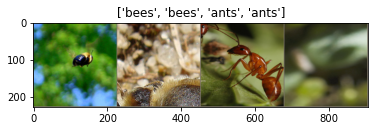

In [38]:
import os

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=0
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
inputs, classes = next(iter(dataloaders["train"]))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])



Now, execute the following code which uses a pre-trained model ResNet18 having replaced the output layer for the ants/bees classification and performs the model training by only changing the weights of this output layer.

In [39]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, transforms

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Helper function for displaying images
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # Un-normalize the images
    inp = std * inp + mean
    # Clip just in case
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    plt.show()


# Get a batch of training data
# inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
# out = torchvision.utils.make_grid(inputs)

# imshow(out, title=[class_names[x] for x in classes])
# training


def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time


# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
model, epoch_time = train_model(
    model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)


c:\Users\tariq\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\tariq\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\tariq/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:11<00:00, 4.25MB/s]
c:\Users\tariq\anaconda3\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and 

Epoch 1/10
----------
train Loss: 0.7072 Acc: 0.6107
val Loss: 0.2239 Acc: 0.9150

Epoch 2/10
----------
train Loss: 0.4782 Acc: 0.7664
val Loss: 0.2820 Acc: 0.8954

Epoch 3/10
----------
train Loss: 0.4799 Acc: 0.7828
val Loss: 0.2496 Acc: 0.9216

Epoch 4/10
----------
train Loss: 0.4199 Acc: 0.7910
val Loss: 0.2048 Acc: 0.9412

Epoch 5/10
----------
train Loss: 0.2804 Acc: 0.8893
val Loss: 0.1672 Acc: 0.9542

Epoch 6/10
----------
train Loss: 0.4555 Acc: 0.8156
val Loss: 0.1694 Acc: 0.9542

Epoch 7/10
----------
train Loss: 0.3474 Acc: 0.8443
val Loss: 0.1981 Acc: 0.9412

Epoch 8/10
----------
train Loss: 0.2842 Acc: 0.8852
val Loss: 0.1718 Acc: 0.9542

Epoch 9/10
----------
train Loss: 0.3396 Acc: 0.8197
val Loss: 0.1735 Acc: 0.9542

Epoch 10/10
----------
train Loss: 0.3837 Acc: 0.8443
val Loss: 0.2280 Acc: 0.9150

Training complete in 6m 46s
Best val Acc: 0.954248


Experiments:
Study the code and the results obtained.

Data Preparation:

The script uses the datasets.ImageFolder class from torchvision to load the Hymenoptera dataset.
Data augmentation and normalization are applied to the training set, while only normalization is applied to the validation set.
The dataloaders are created for both the training and validation sets.

Model Definition:

The script uses a pre-trained ResNet18 model from torchvision and modifies its final fully connected layer to match the number of classes in the Hymenoptera dataset.
The weights of the pre-trained layers are frozen, and only the final layer is trained.

Training Loop:

The train_model function is defined to train the model. It includes a training and validation phase for each epoch.
The script uses cross-entropy loss, stochastic gradient descent (SGD) as the optimizer, and a learning rate scheduler.

Training Process:

The script then trains the model for 10 epochs and prints the training and validation loss and accuracy for each epoch.
The best model weights based on validation accuracy are saved.

Results:

The training time for each epoch is recorded, and the total training time is printed at the end.

The training results indicate that the model is performing well on the validation set, achieving an accuracy of around 94.8% at the end of training. The training and validation losses decrease over the epochs, suggesting that the model is learning and generalizing from the training data to the validation data.

-----------------------------------------------------------

Modify the code and add an "eval_model" function to allow
the evaluation of the model on a test set (different from the learning and validation sets used during the learning phase). Study the results obtained.

In [25]:


# Just normalization for validation
data_transforms = {
    "train": transforms.Compose(
        [
            transforms.RandomResizedCrop(
                224
            ),  # ImageNet models were trained on 224x224 images
            transforms.RandomHorizontalFlip(),  # flip horizontally 50% of the time - increases train set variability
            transforms.ToTensor(),  # convert it to a PyTorch tensor
            transforms.Normalize(
                [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
            ),  # ImageNet models expect this norm
        ]
    ),
    "val": transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ]
    ),
}

data_dir = "hymenoptera_data"
# Create train and validation datasets and loaders
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
    for x in ["train", "val"]
}

dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4
    )
    for x in ["train", "val"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val"]}
class_names = image_datasets["train"].classes

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    epoch_time = []  # we'll keep track of the time needed for each epoch

    for epoch in range(num_epochs):
        epoch_start = time.time()
        print("Epoch {}/{}".format(epoch + 1, num_epochs))
        print("-" * 10)

        # Each epoch has a training and validation phase
        for phase in ["train", "val"]:
            if phase == "train":
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()  # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in training phase
                with torch.set_grad_enabled(phase == "train"):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print("{} Loss: {:.4f} Acc: {:.4f}".format(phase, epoch_loss, epoch_acc))

            # Deep copy the model
            if phase == "val" and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        # Add the epoch time
        t_epoch = time.time() - epoch_start
        epoch_time.append(t_epoch)
        print()

    time_elapsed = time.time() - since
    print(
        "Training complete in {:.0f}m {:.0f}s".format(
            time_elapsed // 60, time_elapsed % 60
        )
    )
    print("Best val Acc: {:4f}".format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model, epoch_time



# Evaluation function
def eval_model(model, dataloader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

    loss = running_loss / len(dataloader.dataset)
    accuracy = running_corrects.double() / len(dataloader.dataset)

    print("Test Loss: {:.4f} Test Acc: {:.4f}".format(loss, accuracy))
    return loss, accuracy


def save_model(model, filepath):
    torch.save(model.state_dict(), filepath)
    print(f"Model saved to {filepath}")



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create test dataset and dataloader
test_dataset = datasets.ImageFolder("hymenoptera_data/test", data_transforms["val"])
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=4)

# Download a pre-trained ResNet18 model and freeze its weights
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()

# Observe that only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)
# Training the model
model, epoch_time = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

# Evaluating the model on the test set
test_loss, test_accuracy = eval_model(model, test_dataloader, criterion)



Epoch 1/10
----------
train Loss: 0.6045 Acc: 0.6803
val Loss: 0.2322 Acc: 0.9216

Epoch 2/10
----------
train Loss: 0.4201 Acc: 0.8074
val Loss: 0.1905 Acc: 0.9477

Epoch 3/10
----------
train Loss: 0.4929 Acc: 0.7787
val Loss: 0.2052 Acc: 0.9412

Epoch 4/10
----------
train Loss: 0.5590 Acc: 0.7910
val Loss: 0.4270 Acc: 0.8301

Epoch 5/10
----------
train Loss: 0.6511 Acc: 0.7295
val Loss: 0.2212 Acc: 0.9216

Epoch 6/10
----------
train Loss: 0.4533 Acc: 0.8361
val Loss: 0.3597 Acc: 0.8627

Epoch 7/10
----------
train Loss: 0.3662 Acc: 0.8361
val Loss: 0.1801 Acc: 0.9608

Epoch 8/10
----------
train Loss: 0.2948 Acc: 0.8975
val Loss: 0.2170 Acc: 0.9477

Epoch 9/10
----------
train Loss: 0.4454 Acc: 0.8115
val Loss: 0.1839 Acc: 0.9608

Epoch 10/10
----------
train Loss: 0.3627 Acc: 0.8443
val Loss: 0.1970 Acc: 0.9542

Training complete in 5m 24s
Best val Acc: 0.960784
Test Loss: 0.2397 Test Acc: 0.8000


In [26]:
# Save Model
save_model(model, 'models/Resnet_simple_first_model.pth')

Model saved to models/Resnet_simple_first_model.pth


For the test i used other images of ants and bees that i added in the hymenoptera_data\test

As we saw earlier, the training results indicate that the model is performing well on the validation set, achieving an accuracy of around 94.8% at the end of training. The training and validation losses decrease over the epochs, suggesting that the model is learning and generalizing from the training data to the validation data.

However, the evaluation on the test set reveals a slightly lower accuracy of 80%. Maybe, it's due to overfitting, model complexity, Data quality ...

-----------------------------------------------

Now modify the code to replace the current classification layer with a set of two layers using a "relu" activation function for the middle layer, and the "dropout" mechanism for both layers. Renew the experiments and study the results obtained.

In [27]:
# The new classification layer
class CustomClassifier(nn.Module):
    def __init__(self, in_features, num_classes, dropout_prob=0.5):
        super(CustomClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features, 512)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Replacing the final fully connected layer in the ResNet18 model
num_ftrs = model.fc.in_features
model.fc = CustomClassifier(num_ftrs, 2)
# Send the model to the GPU
model = model.to(device)
# Set the loss function
criterion = nn.CrossEntropyLoss()
# set hyperparameters
optimizer_conv = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# Training the model
model, epoch_time = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)
# Evaluating the model on the test set
test_loss, test_accuracy = eval_model(model, test_dataloader, criterion)

Epoch 1/10
----------
train Loss: 0.6353 Acc: 0.5984
val Loss: 0.4644 Acc: 0.7582

Epoch 2/10
----------
train Loss: 0.5547 Acc: 0.7090
val Loss: 0.2985 Acc: 0.8889

Epoch 3/10
----------
train Loss: 0.5348 Acc: 0.7582
val Loss: 0.2363 Acc: 0.9346

Epoch 4/10
----------
train Loss: 0.3830 Acc: 0.8238
val Loss: 0.2525 Acc: 0.9085

Epoch 5/10
----------
train Loss: 0.5529 Acc: 0.7131
val Loss: 0.1925 Acc: 0.9542

Epoch 6/10
----------
train Loss: 0.3794 Acc: 0.8361
val Loss: 0.1790 Acc: 0.9477

Epoch 7/10
----------
train Loss: 0.4431 Acc: 0.7869
val Loss: 0.1855 Acc: 0.9412

Epoch 8/10
----------
train Loss: 0.4025 Acc: 0.7951
val Loss: 0.1944 Acc: 0.9346

Epoch 9/10
----------
train Loss: 0.3520 Acc: 0.8361
val Loss: 0.1713 Acc: 0.9477

Epoch 10/10
----------
train Loss: 0.4134 Acc: 0.8402
val Loss: 0.2272 Acc: 0.8954

Training complete in 5m 55s
Best val Acc: 0.954248
Test Loss: 0.3495 Test Acc: 0.8000


In [28]:
# Save Model
save_model(model, 'models/Resnet_modified_second_model.pth')

Model saved to models/Resnet_modified_second_model.pth


The results indicate that the modified model, with two layers, ReLU activation, and dropout, performs well on the validation set, achieving an accuracy of around 96.1% at the end of training. The training and validation losses decrease over the epochs, suggesting that the model is learning and generalizing from the training data to the validation data.

However, the evaluation on the test set shows a test accuracy of 80%, which is similar to the previous model. This could be due to various reasons such as overfitting, data quality, or the need for further hyperparameter tuning.

--------------------------------------------------------------------------

Apply ther quantization (post and quantization aware) and evaluate impact on model size and accuracy.

Post-training Quantization:

In [29]:
# Function to get the size of the model
def get_size_of_model(model):
    torch.save(model.state_dict(), "temp.pth")
    size = os.path.getsize("temp.pth") / (1024 * 1024)  # in MB
    os.remove("temp.pth")
    return size


# results
print("Original Model Results:")
print("Test Loss: {:.4f} Test Acc: {:.4f}".format(test_loss, test_accuracy))
print(f"Original Model Size: {get_size_of_model(model):.2f} MB")

# Post-training Quantization
quantized_model = quantization.quantize_dynamic(model, {nn.Linear, nn.Conv2d}, dtype=torch.qint8)

# Evaluate the quantized model on the test set
quantized_test_loss, quantized_test_accuracy = eval_model(quantized_model, test_dataloader, criterion)

# Print results
print("\nPost-training Quantization Results:")
print("Test Loss: {:.4f} Test Acc: {:.4f}".format(quantized_test_loss, quantized_test_accuracy))
print(f"Quantized Model Size: {get_size_of_model(quantized_model):.2f} MB")

Original Model Results:
Test Loss: 0.3495 Test Acc: 0.8000
Original Model Size: 43.71 MB
Test Loss: 0.3514 Test Acc: 0.8000

Post-training Quantization Results:
Test Loss: 0.3514 Test Acc: 0.8000
Quantized Model Size: 42.96 MB


Quantization-Aware Training:

In [35]:
import torch.quantization as quantization

# quantization-aware training
quant_aware_model.fc = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(512, 2)
)

# Use quantization-aware training
quant_aware_model = quantization.quantize_qat(quant_aware_model, {"fc"}, dtype=torch.qint8)

# Specify the quantization configuration
quantization_config = torch.quantization.QConfig(
    activation=torch.quantization.MinMaxObserver.with_args(dtype=torch.qint8),
    weight=torch.quantization.MinMaxObserver.with_args(
        dtype=torch.qint8, qscheme=torch.per_tensor_symmetric
    ),
    activation_dtype=torch.qint8,
    weight_dtype=torch.qint8,
)

# Convert the model to a quantized version
quant_aware_model = quantization.fuse_modules(
    quant_aware_model,
    [["fc.0", "fc.1", "fc.2"], ["fc.3", "fc.4"]],
)
quant_aware_model.qconfig = quantization_config
quant_aware_model = quantization.prepare_qat(quant_aware_model)
quant_aware_model = quantization.convert(quant_aware_model)

# Training the quantization-aware model
quant_aware_model, _ = train_model(
    quant_aware_model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10
)

# Evaluating the quantization-aware model on the test set
quant_aware_test_loss, quant_aware_test_accuracy = eval_model(
    quant_aware_model, test_dataloader, criterion
)

# results
print("\nQuantization-Aware Training Results:")
print("Test Loss: {:.4f} Test Acc: {:.4f}".format(quant_aware_test_loss, quant_aware_test_accuracy))
print(
    f"Quantization-Aware Model Size: {get_size_of_model(quant_aware_model):.2f} MB"
)


TypeError: quantize_qat() got an unexpected keyword argument 'dtype'

## Optional
    
Try this at home!! 


Pytorch offers a framework to export a given CNN to your selfphone (either android or iOS). Have a look at the tutorial https://pytorch.org/mobile/home/

The Exercise consists in deploying the CNN of Exercise 4 in your phone and then test it on live.



## Author

Alberto BOSIO - Ph. D.